# Loading Modules and Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

iris_data = pd.read_csv('./Iris.csv');
iris_data = iris_data.drop(labels=['Id'], axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Getting basic information

In [4]:
# Summary of Data
df = iris_data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Unique Species
df = iris_data
print(df['Species'].unique())
df['Species'].value_counts()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Preprocessing the Dataset

In [7]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot: >

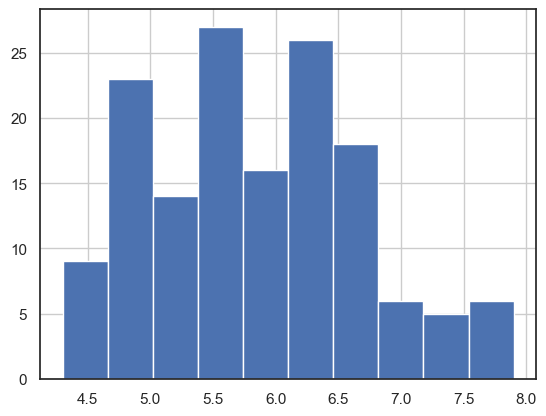

In [8]:
# Normally Distributed - Good For Training
df['SepalLengthCm'].hist()

<AxesSubplot: >

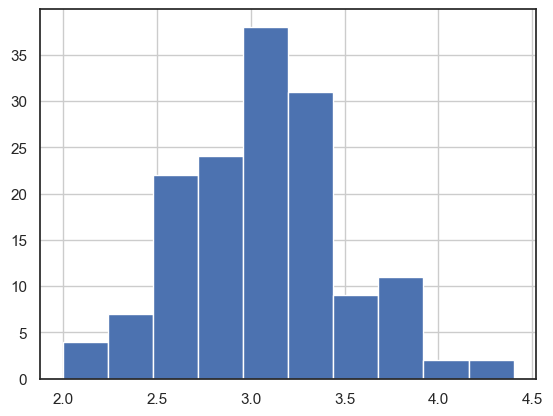

In [9]:
# Normally Distributed - Good For Training
df['SepalWidthCm'].hist()

<AxesSubplot: >

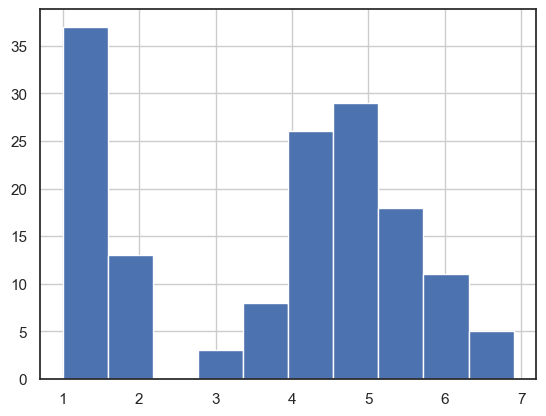

In [10]:
# Shows that one class is separated from the other 2
df['PetalLengthCm'].hist()

<AxesSubplot: >

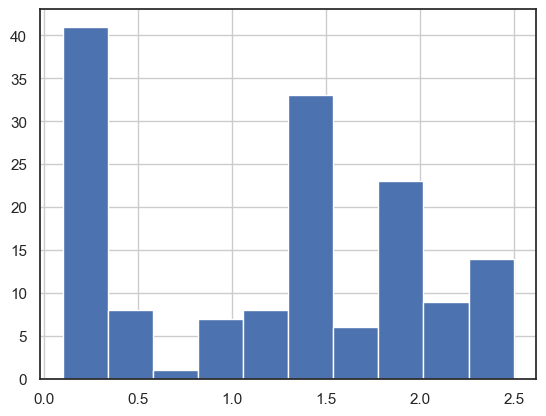

In [11]:
# Shows that one class is separated from the other 2
df['PetalWidthCm'].hist()

/Users/ferdz/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


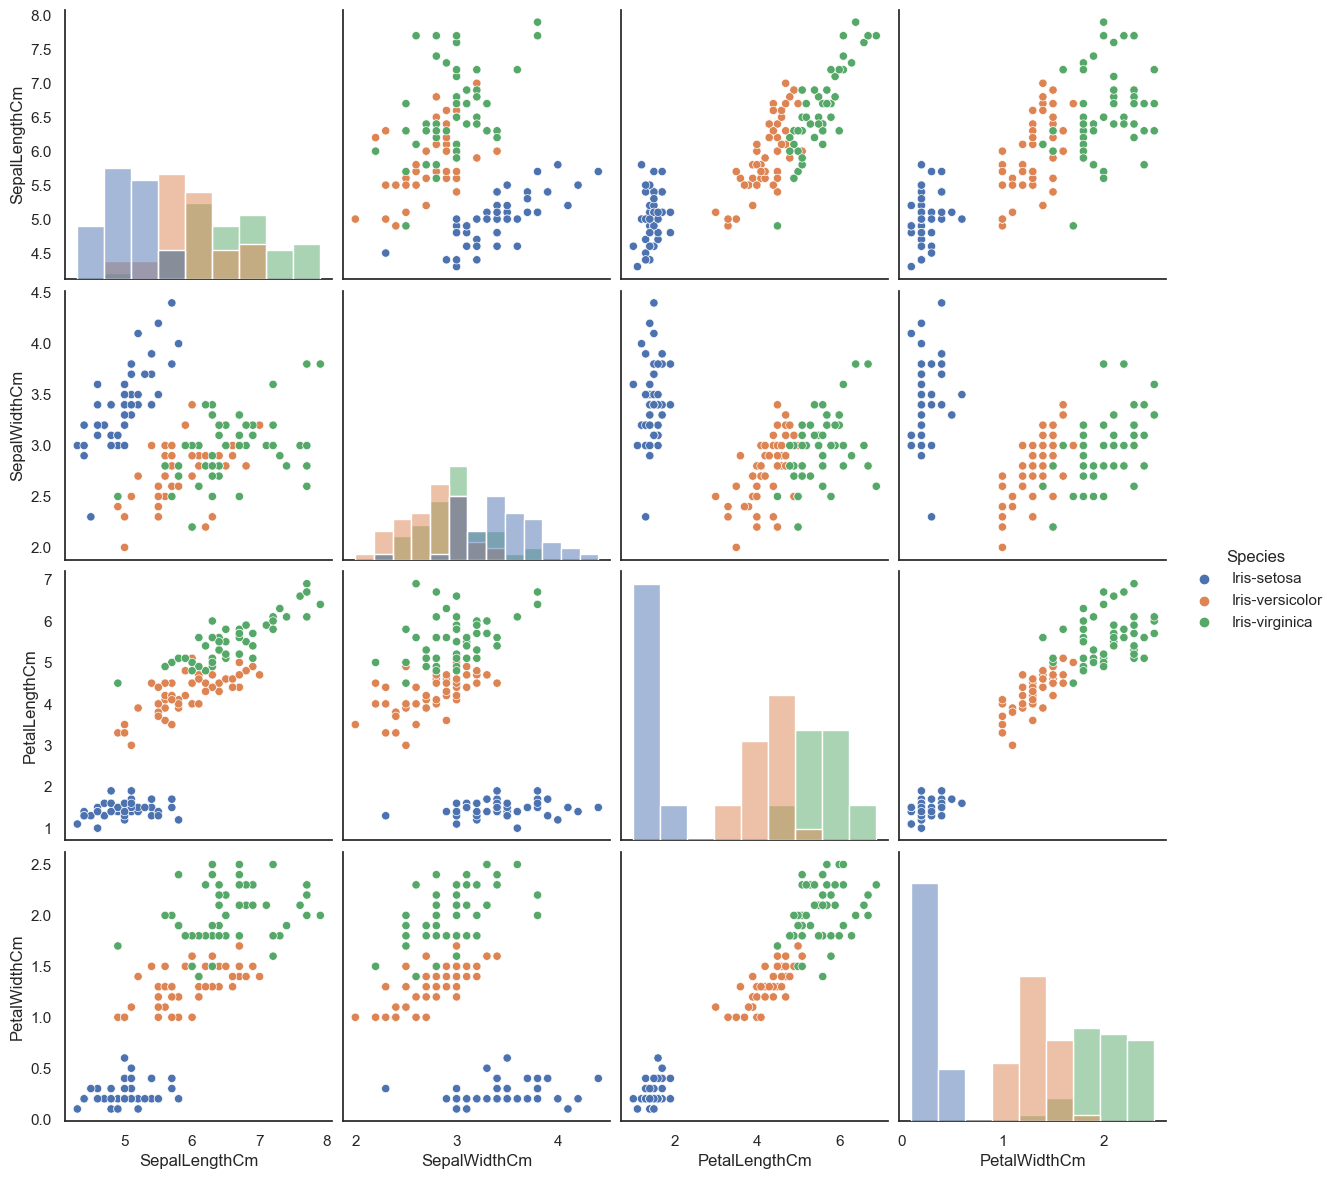

In [12]:
# Pairplot shows the histograms on that we plotted earlier on the diagonal
# and the scatter plot (shows relationship) for each variable relationship 
df = iris_data
sns.pairplot(data=df, hue='Species', size=3, diag_kind='hist')


# Correlation Matrix

##### A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. 
##### The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [13]:
df = iris_data
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot: >

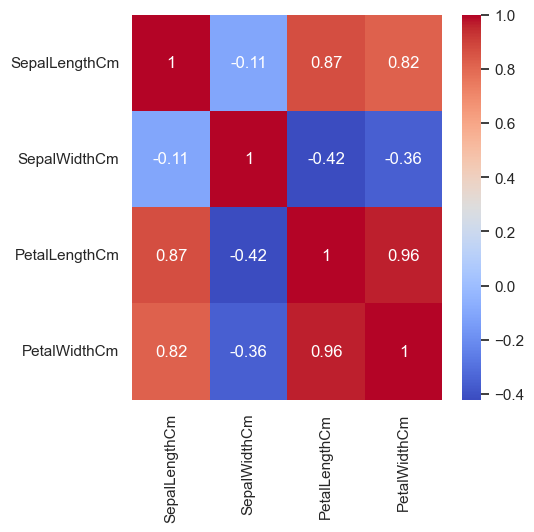

In [14]:
corr = df.corr()

fig, axes = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=axes, cmap='coolwarm')

# Label Encoder
##### In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df['Species'] = le.fit_transform(df['Species'])

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [43]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
x = df.drop(columns=['Species'])
y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [44]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [45]:
# model training
model.fit(x_train, y_train)

/Users/ferdz/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
# print metric to get performance
print("Accuracy:", model.score(x_test, y_test))

Accuracy: 0.9333333333333333


In [40]:
# knn - k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [41]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
# print metric to get performance
print("Accuracy:", model.score(x_test, y_test))

Accuracy: 0.9555555555555556


In [46]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [48]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
# print metric to get performance
print("Accuracy:", model.score(x_test, y_test))

Accuracy: 0.9555555555555556
